<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree

## Voorbeeld 'Hartaanval'

In [2]:
# beschouwde gezondheidsparameters zijn 'pijn in borststreek', 'man', 'rookt' en 'voldoende beweging'
# waarden van deze gezondheidsparameters staan in resp. kolom 1, 2, 3, 4 van matrix data
# elke rij komt overeen met één patiënt
# laatste kolom geeft of patiënt risico loopt op hartaanval ('1') of niet ('0').
data = np.array(
      [[1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1],
       [0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0]])

In [3]:
# gezondheidsparameters en klasse onderscheiden
gezondheidsparameters = data[:, :4]        # eerste 4 kolommen van matrix zijn beschouwde parameters
klasse = data[:,4]                         # laatste kolom zijn klasse waartoe patiënt behoort

# beslissingsboom genereren op basis van data
beslissingsboom = tree.DecisionTreeClassifier(criterion="gini")   # boom wordt aangemaakt via gini-index
beslissingsboom.fit(gezondheidsparameters, klasse)    # boom genereren die overeenkomt met data

DecisionTreeClassifier()

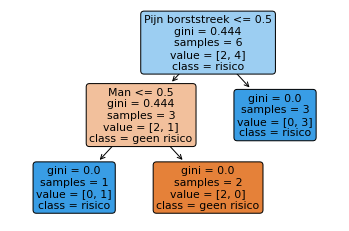

In [4]:
plt.figure()  
tree.plot_tree(beslissingsboom, 
               class_names=["geen risico", "risico"], 
               feature_names=["Pijn borststreek", "Man", "Rookt", "Beweging"], 
               filled=True, rounded=True)
plt.show()

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook AI in de Zorg, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 